 # Dataset Information.
##### 1) id: unique identifier
##### 2) gender: "Male", "Female" or "Other"
##### 3) age: age of the patient
##### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
##### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
##### 6) ever_married: "No" or "Yes"
##### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
##### 8) Residence_type: "Rural" or "Urban"
##### 9) avg_glucose_level: average glucose level in blood
##### 10) bmi: body mass index
##### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
##### 12) stroke: 1 if the patient had a stroke or 0 if not

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
import pandas as pd
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
#returns the number summation of all missing values in the data set.
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#print the no. of records and features
df.shape

(5110, 12)

In [7]:
#1 if the patient had a stroke or 0 if not
#count of 0's and 1's
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [8]:
df.drop(['id'], axis='columns', inplace=True)

In [9]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
#Printing some statistical information of all the numerical features.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df['age']=df['age'].apply(lambda x: round(x))

In [12]:
df['age'][:5]

0    67
1    61
2    80
3    49
4    79
Name: age, dtype: int64

In [13]:
df['bmi'].isnull().sum()

201

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



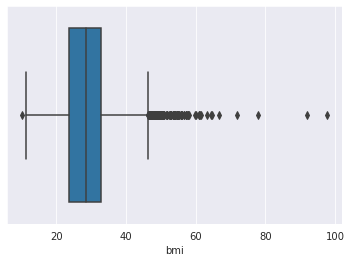

In [62]:
#A boxplot is a standardized way of displaying the distribution of data
#It can tell  about the outliers and what their values in the data sets.
sns.boxplot(df['bmi'])
plt.show()

In [16]:
#filling the NaN values in df['bmi'] column with the mean value of df['bmi']
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [17]:
df['bmi'].isnull().sum()

0

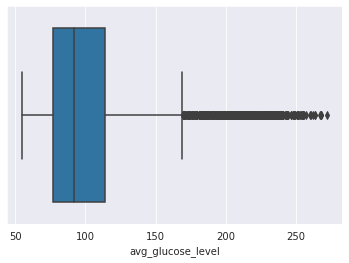

In [69]:
sns.boxplot(df['avg_glucose_level'])
plt.show()


In [19]:
# info() function is used to print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [20]:
#The unique element present in all the categorical features
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

gender: unique elements | ['Male' 'Female' 'Other']
ever_married: unique elements | ['Yes' 'No']
work_type: unique elements | ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: unique elements | ['Urban' 'Rural']
smoking_status: unique elements | ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


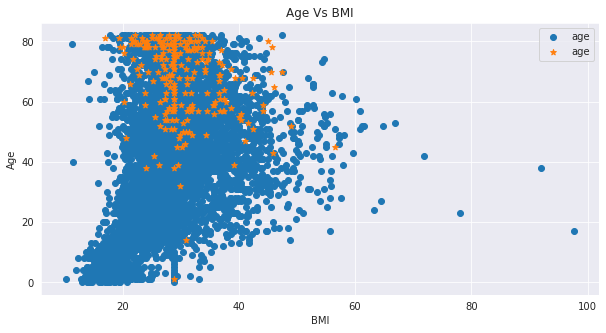

In [70]:
plt.figure(figsize=(10,5))
plt.scatter(x='bmi',y='age', data=df[df['stroke']==0])
plt.scatter(x='bmi',y='age', data=df[df['stroke']==1], marker='*')

plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Age Vs BMI')
plt.legend()
plt.show()

# Observation
From the above plot, I can conclude that the patient whose age is more than 40 has the maximum possibility of getting stroke and BMI within 20 to 50.

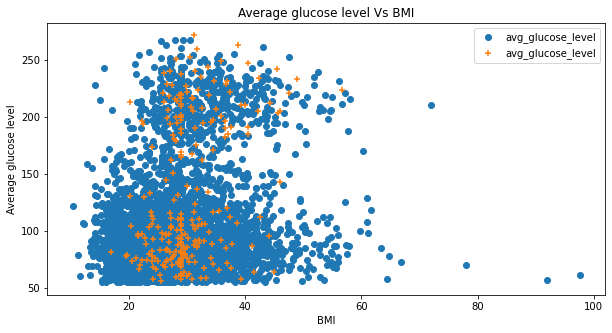

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(x='bmi',y='avg_glucose_level', data=df[df['stroke']==0])
plt.scatter(x='bmi',y='avg_glucose_level', data=df[df['stroke']==1], marker='+')

plt.xlabel('BMI')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs BMI')
plt.legend()
plt.show()

# Observation
From the above plot, I can conclude that the person having the maximum possibility of getting stroke whose BMI within 20 to 50.

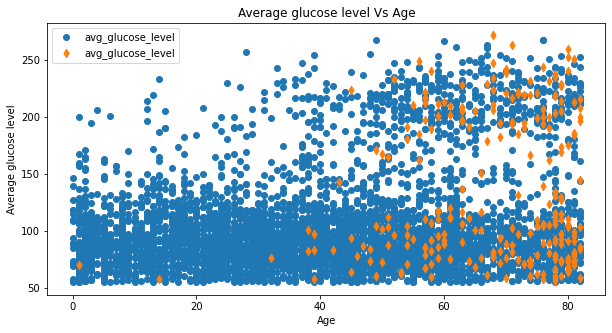

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(x='age',y='avg_glucose_level', data=df[df['stroke']==0])
plt.scatter(x='age',y='avg_glucose_level', data=df[df['stroke']==1], marker='d')

plt.xlabel('Age')
plt.ylabel('Average glucose level')
plt.title('Average glucose level Vs Age')
plt.legend()
plt.show()

# Observation
From the above plot, I can conclude that the person having the maximum possibility of getting a stroke whose Age within 40 to 80.

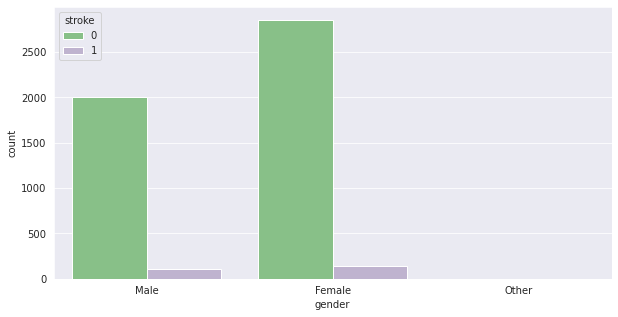

In [24]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['gender'], hue=df['stroke'],palette="Accent")
plt.show()

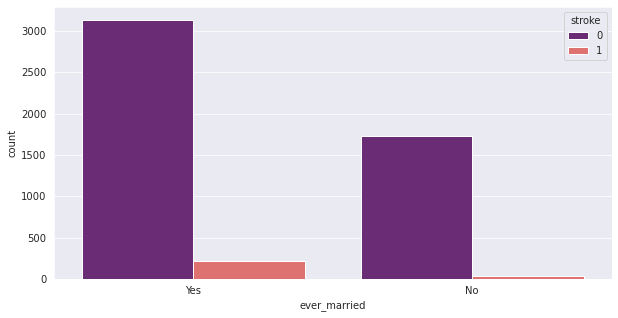

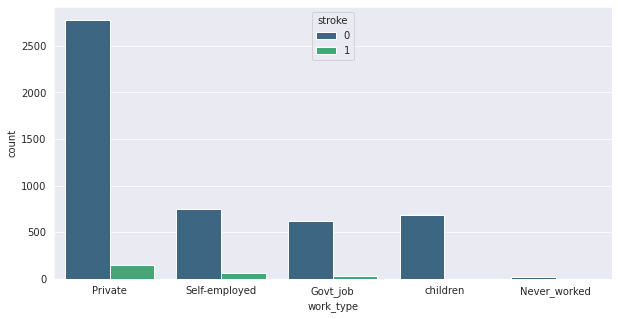

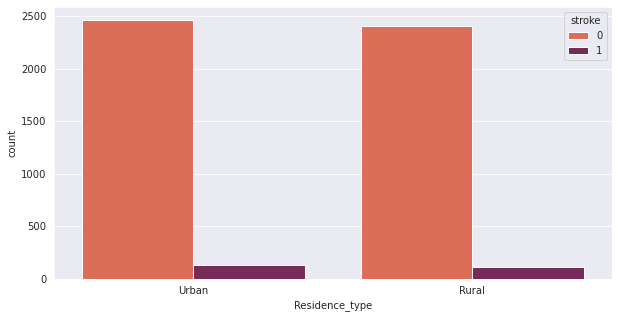

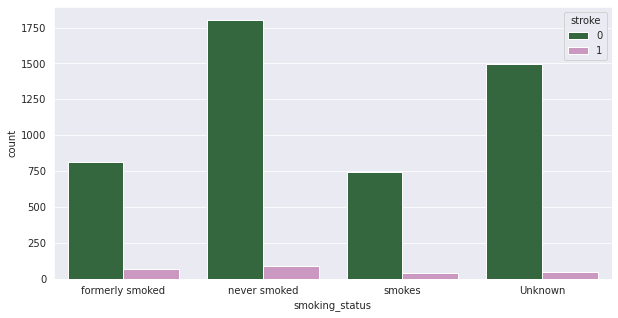

In [25]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['ever_married'], hue=df['stroke'],palette="magma")
plt.show()

plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['work_type'], hue=df['stroke'],palette="viridis")
plt.show()

plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['Residence_type'], hue=df['stroke'],palette="rocket_r")
plt.show()

plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid')
sns.countplot(df['smoking_status'], hue=df['stroke'],palette="cubehelix")
plt.show()

In [26]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3)
print(Q1)

8.999999999999996
32.8
23.8


In [27]:
#removing all the outlier from the dataframe
df_numeric_remove_outlier = df['bmi'][~((df['bmi'] < (Q1 - 1.5 * IQR)) |(df['bmi'] > (Q3 + 1.5 * IQR)))]
df_numeric_remove_outlier.shape

(4984,)

In [28]:
df_numeric_remove_outlier[:5]

0    36.600000
1    28.893237
2    32.500000
3    34.400000
4    24.000000
Name: bmi, dtype: float64

In [29]:
df_new=pd.DataFrame(data=df_numeric_remove_outlier)

In [30]:
df_new.head()

,bmi
0,36.600000
1,28.893237
2,32.500000
3,34.400000
4,24.000000


<AxesSubplot:xlabel='bmi'>

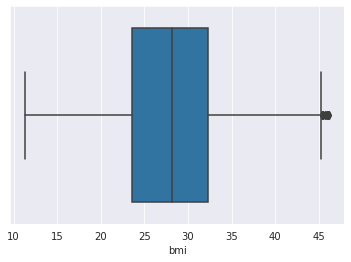

In [31]:
sns.boxplot(df_new['bmi'])

In [32]:
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]

df = df[~df['gender'].isin(['Other'])]

In [33]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['gender']=encoder.fit_transform(df['gender'])
df['ever_married']=encoder.fit_transform(df['ever_married'])
df['work_type']=encoder.fit_transform(df['work_type'])
df['Residence_type']=encoder.fit_transform(df['Residence_type'])
df['smoking_status']=encoder.fit_transform(df['smoking_status'])

In [35]:
col=df[['gender','ever_married','work_type','Residence_type','smoking_status']]
for i in col:
    print(f'{i}: unique elements | {col[i].unique()}')

gender: unique elements | [1 0]
ever_married: unique elements | [1 0]
work_type: unique elements | [2 3 0 4 1]
Residence_type: unique elements | [1 0]
smoking_status: unique elements | [1 2 3 0]


In [36]:
col.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [37]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
df1=pd.concat([col,df_new,df['stroke'],df['age'],df['hypertension'],df['heart_disease'],
              df['avg_glucose_level']],axis=1, join='inner')

In [39]:
df1.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi,stroke,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,36.600000,1,67,0,1,228.69
1,0,1,3,0,2,28.893237,1,61,0,0,202.21
2,1,1,2,0,2,32.500000,1,80,0,1,105.92
3,0,1,2,1,3,34.400000,1,49,0,0,171.23
4,0,1,3,0,2,24.000000,1,79,1,0,174.12


In [40]:
df1.isnull().sum()

gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
bmi                  0
stroke               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
dtype: int64

In [41]:
df.shape

(5109, 11)

In [42]:
df1.shape

(4983, 11)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 608.0 KB


In [44]:
x=df1.drop(['stroke'], axis='columns')
y=df1['stroke']

In [45]:
x.head()

,gender,ever_married,work_type,Residence_type,smoking_status,bmi,age,hypertension,heart_disease,avg_glucose_level
0,1,1,2,1,1,36.600000,67,0,1,228.69
1,0,1,3,0,2,28.893237,61,0,0,202.21
2,1,1,2,0,2,32.500000,80,0,1,105.92
3,0,1,2,1,3,34.400000,49,0,0,171.23
4,0,1,3,0,2,24.000000,79,1,0,174.12


In [46]:
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [47]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
x_scaled=scaler.fit_transform(x)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.25)

Before Over Sampling 3737


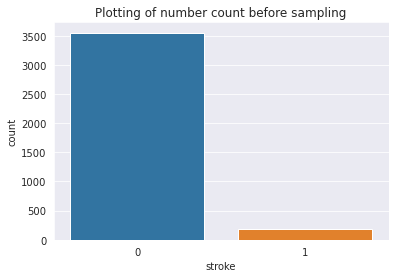

After Over Sampling 7104


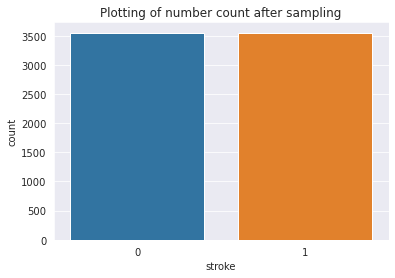

In [49]:
from imblearn.over_sampling import SMOTE
counter=len(y_train)
print('Before Over Sampling', counter)
sns.countplot(y_train)
plt.title('Plotting of number count before sampling')
plt.show()
#oversampling the train datsets using SMOTE
sm=SMOTE()
X_train_sm, y_train_sm=sm.fit_resample(X_train,y_train)
counter=len(y_train_sm)
print('After Over Sampling', counter)
plt.title('Plotting of number count after sampling')
sns.countplot(y_train_sm)
plt.show()

# Making The model by using RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
model_RF=RandomForestClassifier(n_estimators=40)
model_RF.fit(X_train_sm,y_train_sm)

RandomForestClassifier(n_estimators=40)

In [51]:
model_RF.score(X_test,y_test)*100

92.0545746388443

In [52]:
pred_RF=model_RF.predict(X_test)
pred_RF[:5]

array([0, 0, 0, 0, 0])

In [53]:
print(f"Accuracy Score : {round(accuracy_score(y_test, pred_RF) * 100, 2)}%")

Accuracy Score : 92.05%


In [54]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1185
           1       0.17      0.16      0.17        61

    accuracy                           0.92      1246
   macro avg       0.56      0.56      0.56      1246
weighted avg       0.92      0.92      0.92      1246



In [56]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred_RF)
cm

array([[1137,   48],
       [  51,   10]])

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV

In [60]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,25,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [61]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,svm,0.950495,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.949691,{'n_estimators': 30}
2,logistic_regression,0.950495,{'C': 1}
3,decision_tree,0.912499,{'criterion': 'entropy'}


**Hence, we can conclude that this dataset is working best in Logistic Regression and  SVM  with Accuracy score 0.95 and 0.95 respectively.**